<a href="https://colab.research.google.com/github/TottiPuc/Machine_learning/blob/master/Neuron_Artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de aprendizaje del Perceptron

La idea mas simple de un neuron artificial (Perceptron Figura 1), se puede definir como el conjunto de entradas de una muestra ***X*** las cuales representan los estimulos que la neurona recibe del ambiente y que se combinan con los los pesos sinápticos ***W*** para determinar la entrada del neuron, dicha entrada pasa por una función de activación o umbral que genera una salida ***Y*** la cual determinara si el neuron se activa, siempre y cuando el valor de la combinacion lineal de sus entradas con los pesos supere el umbral de activación. 

In [0]:
#importar imagenes desde archivos locales
from google.colab import files
from IPython.display import Image

upload = files.upload()


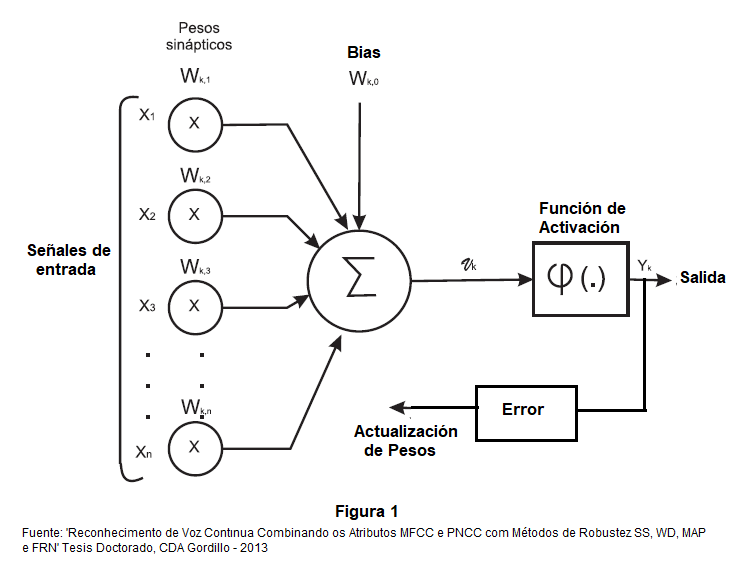

In [6]:
Image('perceptron (1).png',width=1000)

# Algoritmo de Aprendizaje en python

Basados en la regla de aprendizaje del perceptron, que busca imitar la la forma en que funcionan las neuronas en el cerebro (si generan pulsos electricos que se trasmitan a otras neuronas o no), se utiliza la formula de aprendizaje que se resume en 2 pasos:


1.   inicialización de pesos con valores pequeños, [inicializacón de pesos](https://colab.research.google.com/github/TottiPuc/Machine_learning/blob/master/Inicializacion_Pesos.ipynb)
2.   Para cada muestra de entrada de ***X*** se cacula su respectiva salida ***Y*** y se actualizan los pesos ***W*** de la siguiente manera:

  $Wj = Wj + \Delta Wj$

  donde $\Delta Wj$ es:

  $\Delta Wj = \eta (Y - \hat {Y}) Xj$ 

  donde $Y$ es el valor de la etiqueta original y $\hat {Y}$ es el valor calculado a la salida del perceptron, usando como funcion de activación el escalon unitario.


In [0]:
import numpy as np

class Neuron_Perceptron(object):

  def __init__(self, tasa_de_aprendizaje=0.01, numero_de_iteraciones=50 ):
    """inicializamos el objeto perceptron con los parametros obligatorios de numero de iteraciones y tasa de aprendizaje que genralmente esta enentre 0 y 1""" 
    self.tasa_de_aprendizaje = tasa_de_aprendizaje
    self.numero_de_iteraciones = numero_de_iteraciones
    

  def alg_aprendizaje(self, X, Y):
    num_aleatorios = np.random.RandomState(1) # generamos la semilla para reproducir los resultados
    self.pesos = num_aleatorios.normal(loc=0.0, scale=1.0, size= 1 + X.shape[1] ) # generamos un set de numeros aleatorios con una distribucion normal 
                                                                             # de media 0 y varianza 0.01 de tamaño igual al numero de caracteristicas del dataset + 1 a fin de incluir el bias.
    self.errores=[]
    for _ in range(self.numero_de_iteraciones):
      errores=0
      for xi, target in zip(X,Y):
        peso_actualizado = self.tasa_de_aprendizaje*(target - self.salida_predicha(xi))
        self.pesos[1:] += peso_actualizado * xi
        self.pesos[0] += peso_actualizado
        errores += int(peso_actualizado !=0.0)
      self.errores.append(errores)
    return self

  def entrada_red(self,X):
    return np.dot(X,self.pesos[1:])+self.pesos[0]

  def salida_predicha(self,X):
    return  np.where(self.entrada_red(X) >= 0.0 , 1, -1)

# Entrenamient del perceptron
Para entrenara el perceptron y verificar si funciona como buen clasificador binario se usa el dataset Iris disponible en [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris/Iris.data) 

In [3]:
import pandas as pd
from sklearn import datasets 

iris = datasets.load_iris() #imortamos el dataset Iris
iris_df=pd.DataFrame(iris.data)  # lo convertimos a un dataframe con pandas
iris_df['class']=iris['target'] # creamos la columna que define las clases de cada flor
iris_df['class']=iris_df['class'].apply(lambda x: iris['target_names'][x])
iris_df.tail()  # mostramos los ultimos registros para ver si todo esta correcto

,0,1,2,3,class
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


La idea principal de este experimento es clasificar dos de las clases de flores presentes en el dataset Iris (setosas y versicolor). Para eso extraemos las caracteristicas y las etiquetas de estas dos clases de nuestro dataset

In [0]:
import matplotlib.pyplot as plt
import numpy as np

#se seleccionan dos clases de flores del conjunto Iris las setosas y las versicolor y las clasificaremos como -1 y 1 respectivamente

y=iris_df.iloc[0:100,4]
y=np.where( y == 'setosa',-1,1)

# seleccionamos las caracteristicas de longitud de sepalo y longitud de petalo correspondientes a las columnas 0 y 2 del dataframes Iris

X = iris_df.iloc[0:100,[0,2]].values     # se usa values para retornar un array


Grafica tipo scatter para ver la disperción de los datos, en un subespacio de caracteristicas bidimensional

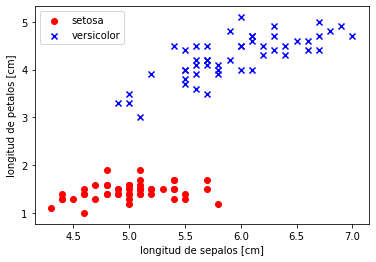

In [16]:
plt.scatter(X[:50,0],X[:50,1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('longitud de sepalos [cm]')
plt.ylabel('longitud de petalos [cm]')
plt.legend(loc='upper left')
plt.show()

Como se puede ver en el grafico de disperción una frontera lineal es capaz de separar las dos clases de flores, esto quiere decir que un buen clasificador lineal podria clasificar de buena forma los tipos de flores setosas de las versicolor

##Proceso de entrenamiento y verificacion del funcionamiento del perceptron

In [37]:
perceptron = Neuron_Perceptron(tasa_de_aprendizaje=0.1,numero_de_iteraciones=10) # creación del objeto perceptron
perceptron.alg_aprendizaje(X,y) # entrenamiento 

En la siguiente grafica se puede ver los errores de clasificacion incorrecta de nuestro perceptron frente al numero de iteraciones

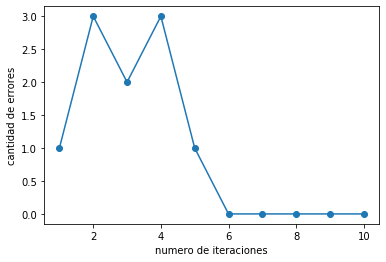

In [38]:
plt.plot(range(1,len(perceptron.errores) + 1), perceptron.errores, marker='o')
plt.xlabel('numero de iteraciones')
plt.ylabel('cantidad de errores')
plt.show()

Como se puede ver el perceptron converge en la sexta iteracion, lo que significa que nuestro clasificador podria identificar correctamente los datos de entrenamiento